In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset.zip" -d "/content/drive/MyDrive/Colab Notebooks/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1020.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0458.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0504.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0262.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0276.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1168.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0510.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0538.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1140.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1154.jpg  
  inflati

In [ ]:
#OS libs
import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warningds
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data_path = '/content/drive/MyDrive/Colab\xa0Notebooks/dataset/Training'
filepaths = []
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    if os.path.isdir(f_path):
        filelist = os.listdir(f_path)

        for file in filelist:
            filepaths.append(os.path.join(f_path, file))
            labels.append(fold)

##Concat data path with labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='label')
train_df = pd.concat([Fseries, Lseries], axis=1)

In [ ]:
train_df

,filepaths,label
0,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
1,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
2,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
3,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
4,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
...,...,...
5707,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
5708,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
5709,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
5710,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma


In [ ]:
test_data_path = '/content/drive/MyDrive/Colab\xa0Notebooks/dataset/Testing'
filepaths = []
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path, fold)
    if os.path.isdir(f_path):
        filelist = os.listdir(f_path)

        for file in filelist:
            filepaths.append(os.path.join(f_path, file))
            labels.append(fold)

##Concat data path with labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='label')
test_df = pd.concat([Fseries, Lseries], axis=1)

In [ ]:
test_df

,filepaths,label
0,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
1,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
2,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
3,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
4,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
...,...,...
1306,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1307,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1308,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1309,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma


In [ ]:
valid , test = train_test_split(test_df, test_size=0.5, shuffle = True, random_state= 42)

In [ ]:
img_size = (224 ,244)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


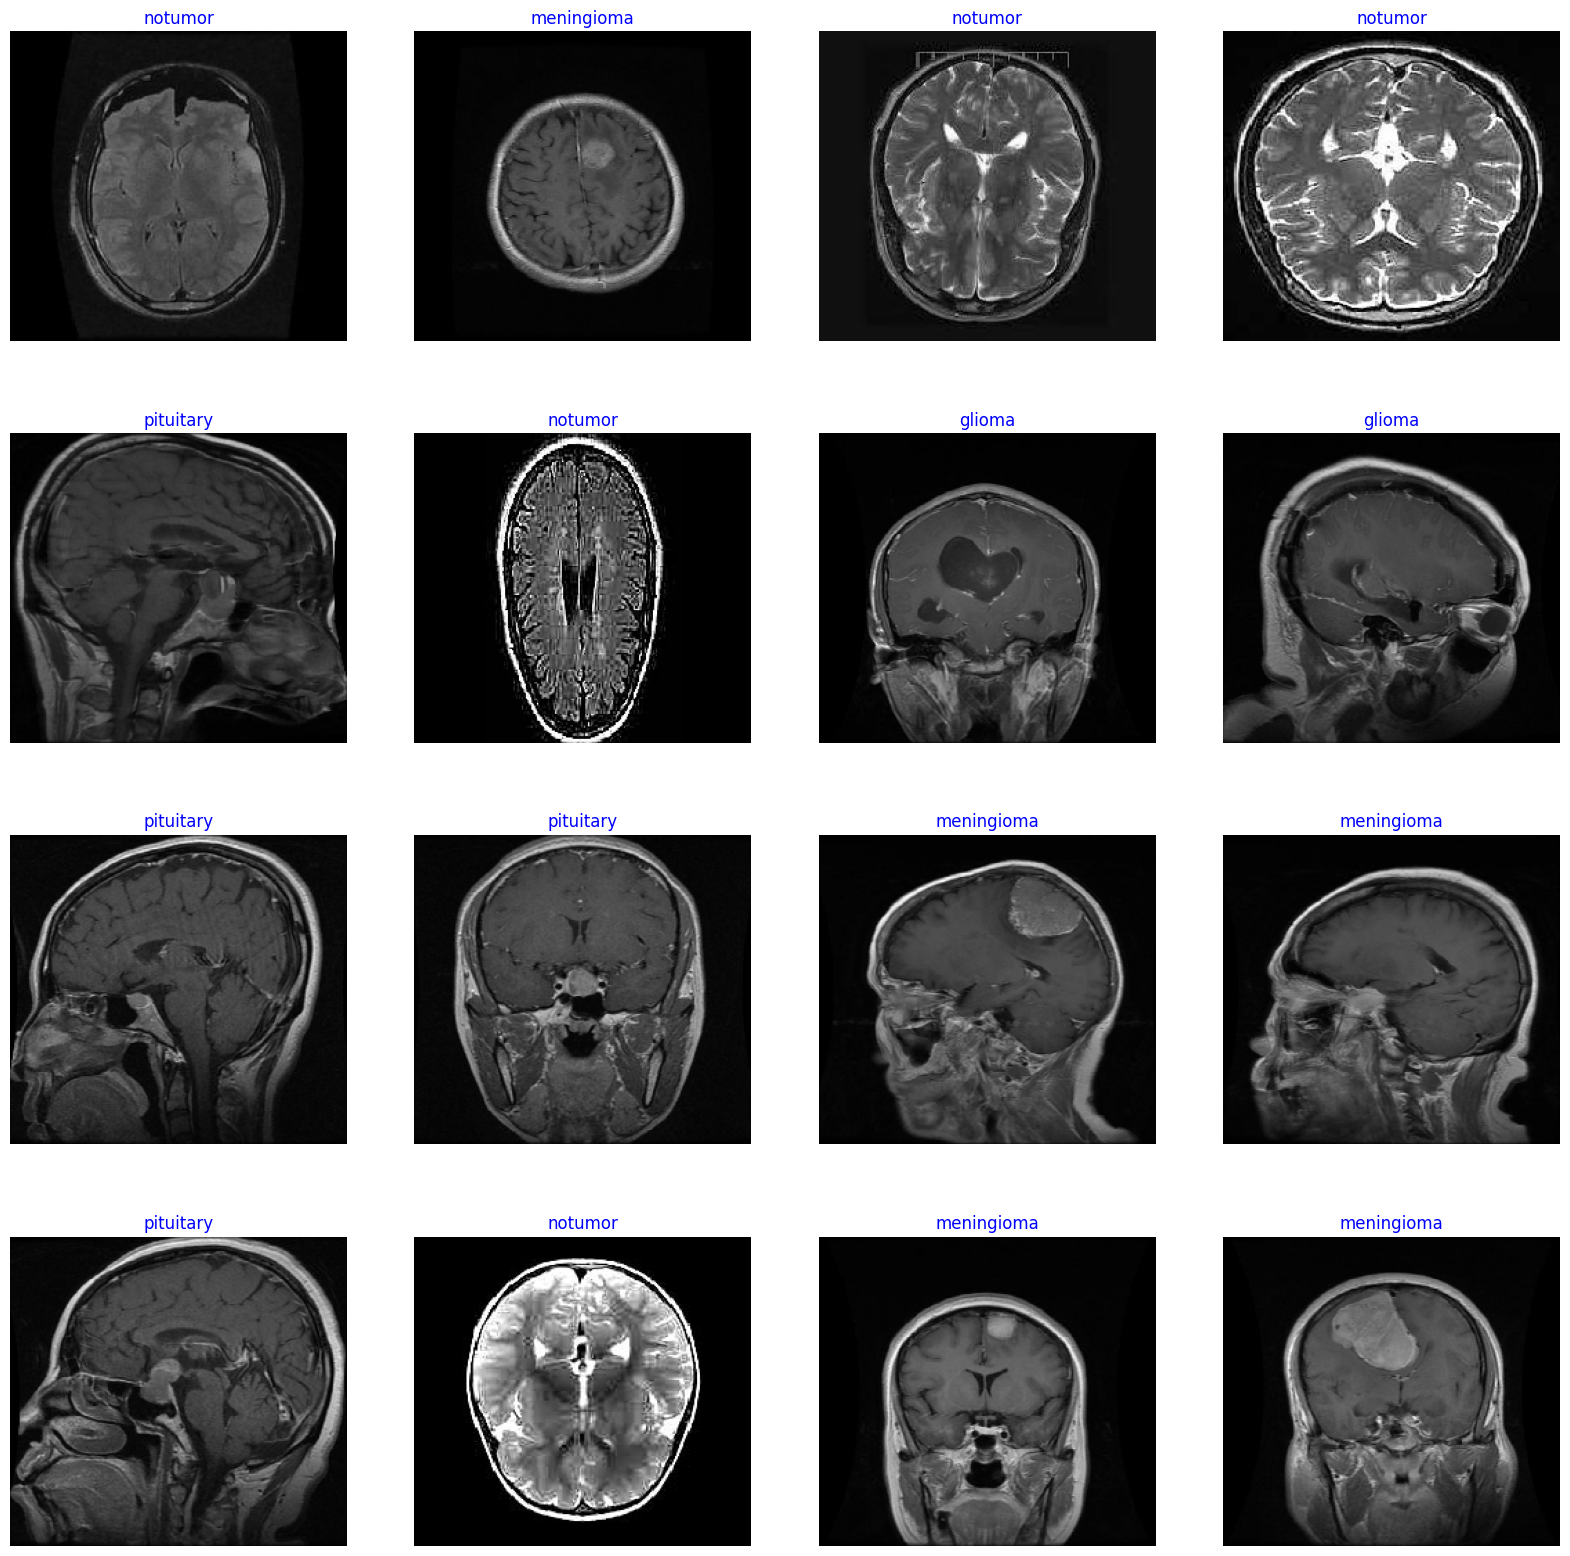

In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize = (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color = "blue", fontsize = 12)
    plt.axis("off")
plt.show();

In [ ]:
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top = False , weights = 'imagenet',
    input_shape = img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 1280)           │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,253,396 (23.85 MB)

 Trainable params: 6,190,228 (23.61 MB)

 Non-trainable params: 63,168 (246.75 KB)

In [ ]:
Epochs = 10

history = model.fit(
 train_gen,
 epochs=Epochs,
 verbose=1,
 validation_data=valid_gen,
 shuffle=True
)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1845s 5s/step - accuracy: 0.5922 - loss: 10.6158 - val_accuracy: 0.5863 - val_loss: 5.3239
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1661s 5s/step - accuracy: 0.5093 - loss: 4.7921 - val_accuracy: 0.7160 - val_loss: 3.4394
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1665s 5s/step - accuracy: 0.7023 - loss: 3.0953 - val_accuracy: 0.8305 - val_loss: 2.1892
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1630s 5s/step - accuracy: 0.8341 - loss: 2.0407 - val_accuracy: 0.9221 - val_loss: 1.4428
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1652s 5s/step - accuracy: 0.8655 - loss: 1.4526 - val_accuracy: 0.9450 - val_loss: 1.0246
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1647s 5s/step - accuracy: 0.8850 - loss: 1.1015 - val_accuracy: 0.9573 - val_loss: 0.8223
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1616s 5s/step - accuracy: 0.8991 - loss: 0.9129 - val_accuracy: 0.9603 - val_loss: 0.6933
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1670s 5s/step - accuracy: 0.9172 - loss: 0.7936 -

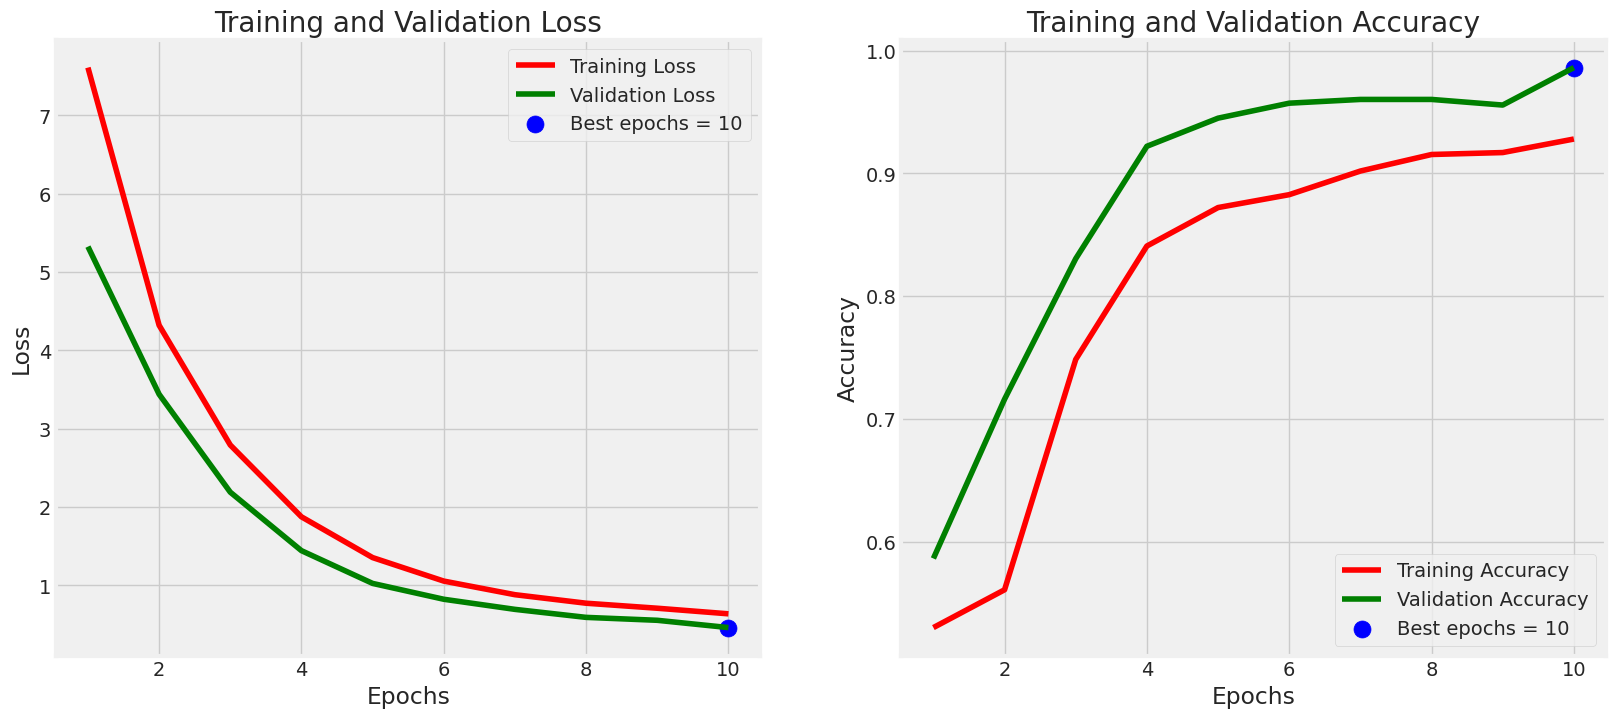

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [ ]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 1.0000 - loss: 0.4396
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9704 - loss: 0.4853
16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.9907 - loss: 0.4519
Train Loss:  0.43571868538856506
Train Accuracy:  1.0
--------------------
Validation Loss:  0.48076331615448
Validation Accuracy:  0.9765625
--------------------
Test Loss:  0.4560856819152832
Test Accuracy:  0.984375


In [ ]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step


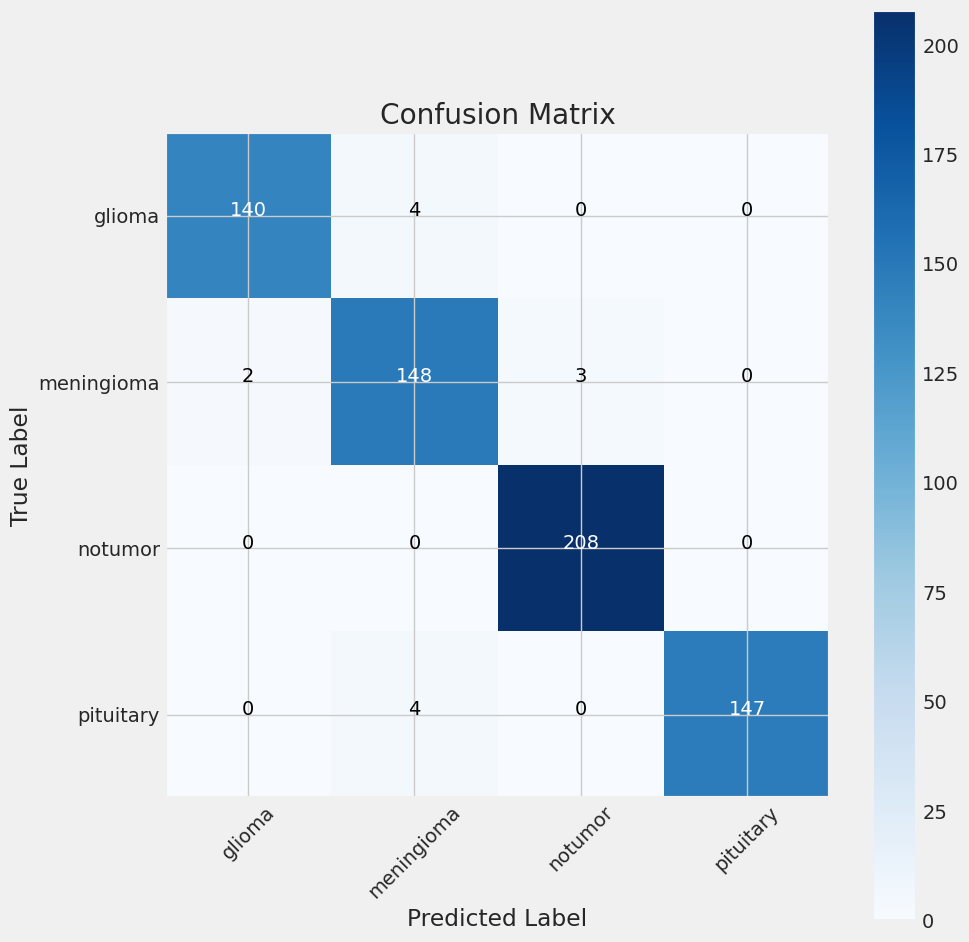

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
#Classification Report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       144
  meningioma       0.95      0.97      0.96       153
     notumor       0.99      1.00      0.99       208
   pituitary       1.00      0.97      0.99       151

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



In [ ]:
model.save("model.h5")

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model('model.h5', compile=False)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
first_image_path = train_df['filepaths'].iloc[0]
gambar = tf.keras.preprocessing.image.load_img(first_image_path, target_size=img_size)

In [ ]:
input_arr = np.array([input_arr])
prediksi = model.predict(input_arr)
predicted_class = np.argmax(prediksi, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


In [ ]:
print(predicted_class)

[3]


In [ ]:
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
names = [classes[i] for i in predicted_class]
print(names)

['pituitary']
